In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
# 模型名稱
models = ['GCN', 'GCN-flow', 'DeepAR', 'LightGBM', 'XGBoost']

# RMSSE 和 WRMSSE 值
rmsse_values = [0.8317, 0.8325, 0.7062, 0.6513, 0.8031]
wrmsse_values = [1.1580, 0.7919, 0.3675, 0.4100, 0.5056]

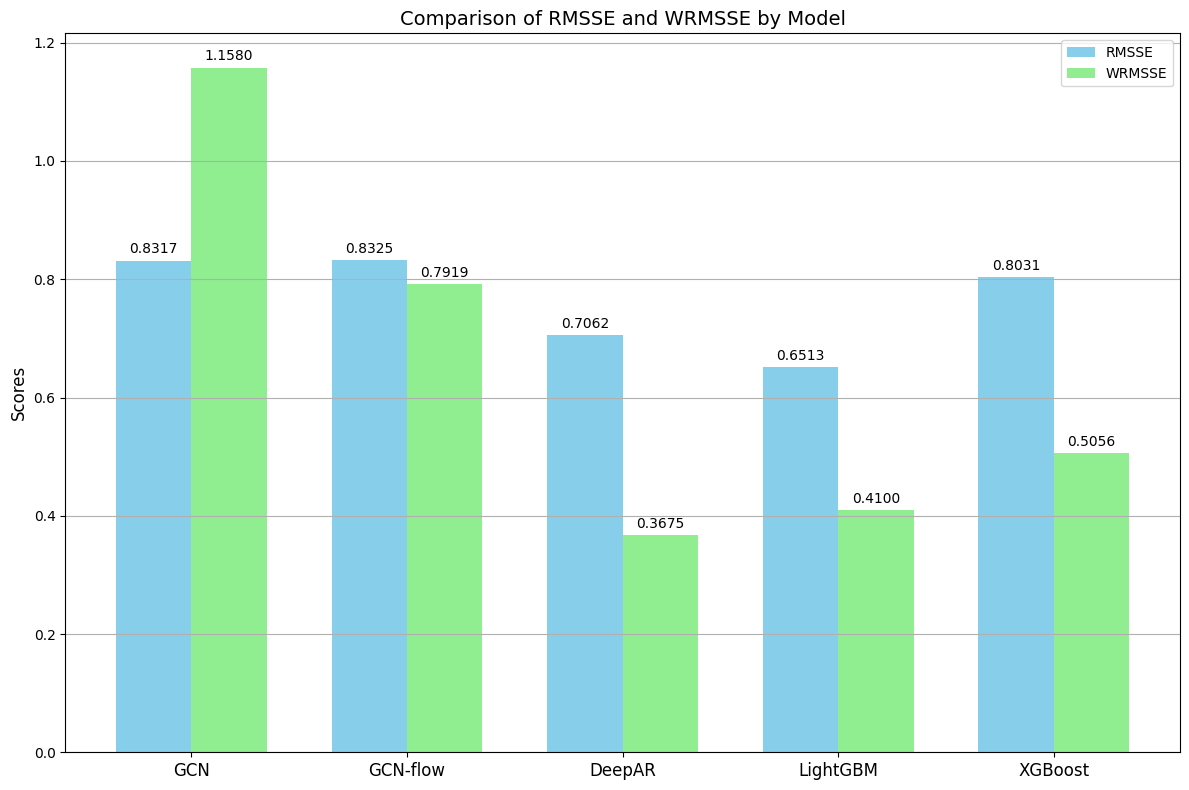

In [5]:
x = np.arange(len(models))  # 模型的 x 位置
width = 0.35  # 條形的寬度

fig, ax = plt.subplots(figsize=(12, 8))  # 設置圖表大小更大
rects1 = ax.bar(x - width/2, rmsse_values, width, label='RMSSE', color='skyblue')
rects2 = ax.bar(x + width/2, wrmsse_values, width, label='WRMSSE', color='lightgreen')

# 添加數據標籤
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# 添加標籤和標題
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of RMSSE and WRMSSE by Model', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend()

# 添加網格線
ax.yaxis.grid(True)

# 優化圖表佈局
plt.tight_layout()

plt.show()


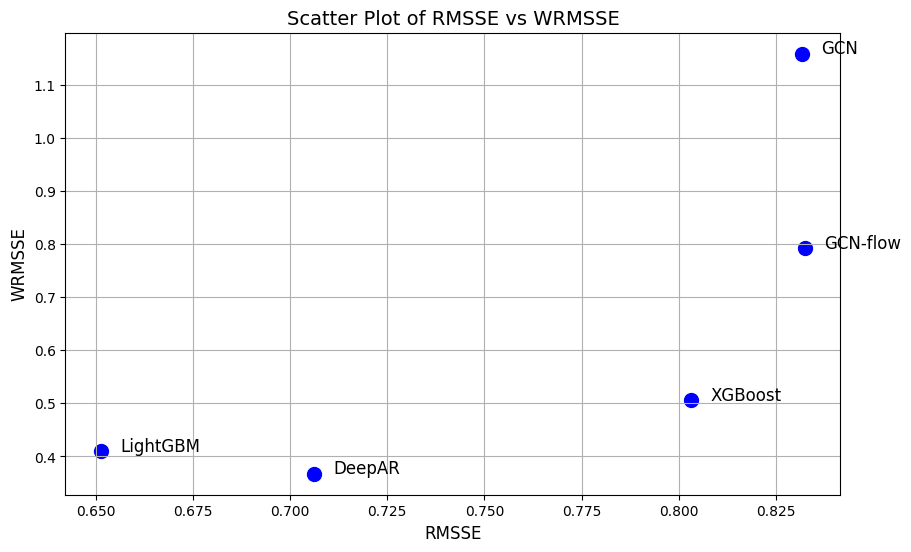

In [12]:
# 散點圖
plt.figure(figsize=(10, 6))
plt.scatter(rmsse_values, wrmsse_values, color='blue', s=100)

# 添加模型名稱為標籤
for i, model in enumerate(models):
    plt.text(rmsse_values[i] + 0.005, wrmsse_values[i], model, fontsize=12)

# 添加標籤和標題
plt.xlabel('RMSSE', fontsize=12)
plt.ylabel('WRMSSE', fontsize=12)
plt.title('Scatter Plot of RMSSE vs WRMSSE', fontsize=14)

# 添加網格線
plt.grid(True)

plt.show()

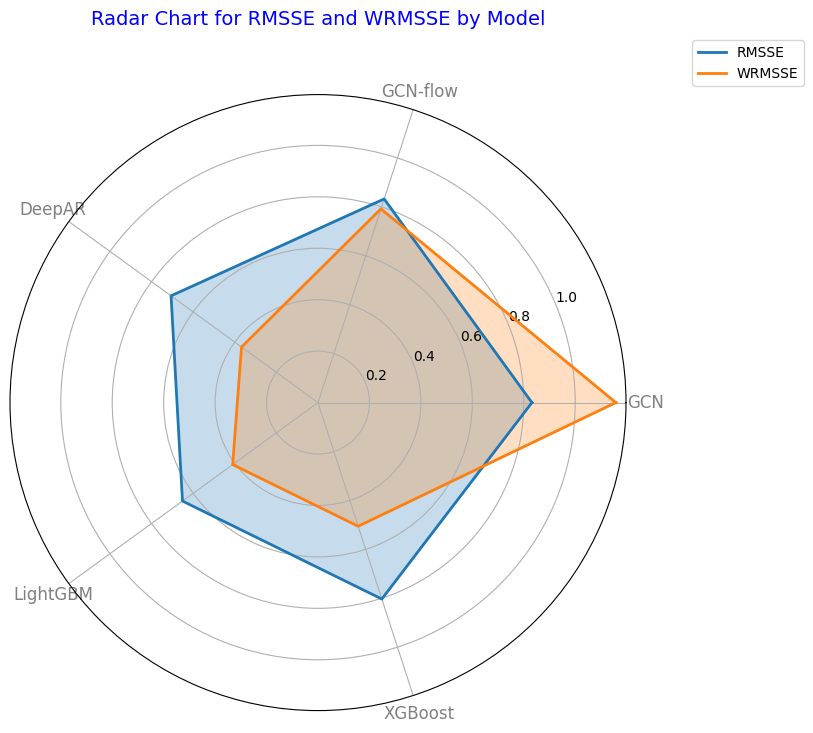

In [9]:
# RMSSE 和 WRMSSE 值
values = [rmsse_values, wrmsse_values]

# 添加起始點到數組的最後，以便形成閉合的多邊形
values = [v + [v[0]] for v in values]

# 設置雷達圖的角度
num_vars = len(models)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 完成雷達圖的環

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 畫雷達圖
for idx, v in enumerate(values):
    ax.plot(angles, v, linewidth=2, linestyle='solid', label=['RMSSE', 'WRMSSE'][idx])
    ax.fill(angles, v, alpha=0.25)

# 添加模型名稱為角度標籤
plt.xticks(angles[:-1], models, color='grey', size=12)

# 添加標題
plt.title('Radar Chart for RMSSE and WRMSSE by Model', size=14, color='blue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

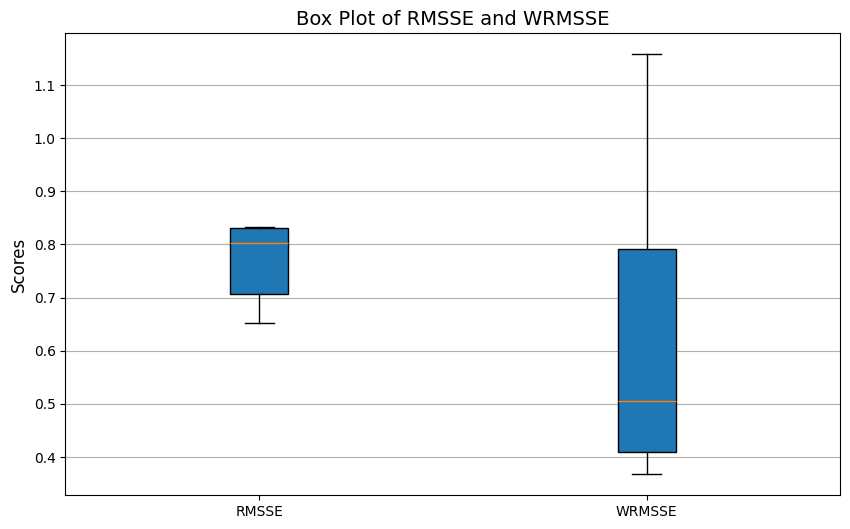

In [13]:
# 整理數據
data = [rmsse_values, wrmsse_values]

# 繪製箱線圖
plt.figure(figsize=(10, 6))
plt.boxplot(data, patch_artist=True, tick_labels=['RMSSE', 'WRMSSE'])  # 使用 'tick_labels' 替代 'labels'

# 添加標題和標籤
plt.title('Box Plot of RMSSE and WRMSSE', fontsize=14)
plt.ylabel('Scores', fontsize=12)

# 添加網格線
plt.grid(axis='y')

plt.show()
